In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

reviews_ba = pd.read_csv('./data/BeerAdvocate/ratings.csv', sep=',')
reviews_rb = pd.read_csv('./data/RateBeer/ratings.csv', sep=',')
reviews_ba['source'] = 'BeerAdvocate'
reviews_rb['source'] = 'RateBeer'

In [2]:
reviews_ba.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review,source
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True,BeerAdvocate
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...,True,BeerAdvocate
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",True,BeerAdvocate
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving,True,BeerAdvocate
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",True,BeerAdvocate


In [3]:
reviews_rb.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,source
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,1461664800,Manslow,175852,2,4,2,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło...",RateBeer
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1487329200,MAGICuenca91,442761,2,3,2,4,8,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...,RateBeer
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1466762400,Sibarh,288889,3,3,2,3,5,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni...",RateBeer
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1451646000,fombe89,250510,4,3,1,2,5,1.5,"Botella, de GabÃ³n regalo familiar.31/01/2015C...",RateBeer
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1445594400,kevnic2008,122778,2,4,2,4,7,1.9,Many thanks for this beer to Erzengel. Pours l...,RateBeer


In [4]:
print(f'BeerAdvocate contains {len(reviews_ba)} reviews in total')
print(f'RateBeer contains {len(reviews_rb)} reviews in total')

BeerAdvocate contains 8393032 reviews in total
RateBeer contains 7122074 reviews in total


### Filtering data to only keep rows with text reviews

In [5]:
reviews_ba_with_text = reviews_ba[~reviews_ba['text'].isna()].copy()
reviews_rb_with_text = reviews_rb[~reviews_rb['text'].isna()].copy()

In [6]:
print(f'BeerAdvocate contains {len(reviews_ba_with_text)} reviews with text')
print(f'RateBeer contains {len(reviews_rb_with_text)} reviews with text')

BeerAdvocate contains 2715678 reviews with text
RateBeer contains 7121583 reviews with text


### Merging the datasets:

In [7]:
all_reviews = pd.concat([reviews_ba, reviews_rb])
all_reviews_with_text = pd.concat([reviews_ba_with_text, reviews_rb_with_text])

In [8]:
print(f'We have a total of {len(all_reviews)} reviews')
print(f'We have a total of {len(all_reviews_with_text)} reviews with text')

We have a total of 15515106 reviews
We have a total of 9837261 reviews with text


### Distribution of beer ratings per website

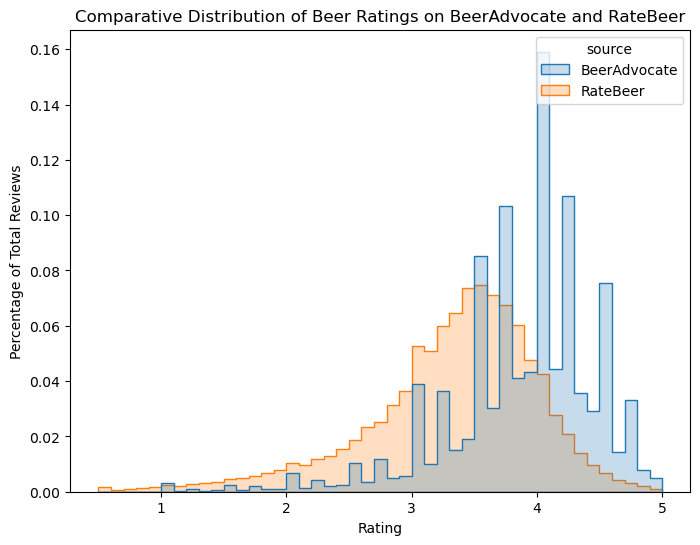

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(data=all_reviews[['rating', 'source']], 
             x='rating', hue='source', 
             element='step', stat='probability', 
             common_norm=False, binwidth=0.1)
plt.title("Comparative Distribution of Beer Ratings on BeerAdvocate and RateBeer")
plt.xlabel("Rating")
plt.ylabel("Percentage of Total Reviews")
plt.show()

### Number of reviews per beer

The data here is clearly expected to be heavy-tailed. A few beers are expected to have much more reviews than the rest.

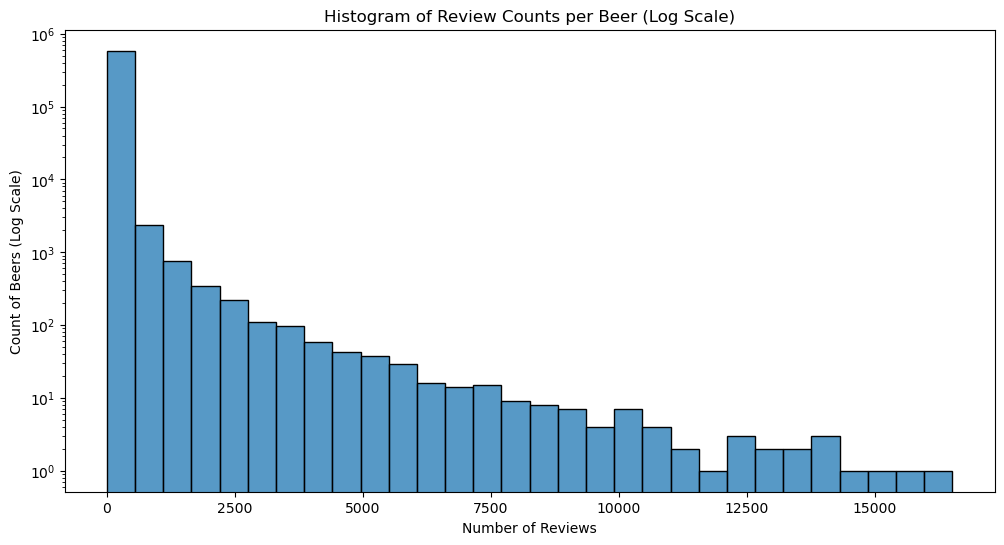

In [10]:
# Count the number of reviews per beer
review_counts = all_reviews['beer_name'].value_counts()

# Create a histogram with a logarithmic y-axis
plt.figure(figsize=(12, 6))
sns.histplot(review_counts, bins=30, log_scale=(False, True))
plt.title("Histogram of Review Counts per Beer (Log Scale)")
plt.xlabel("Number of Reviews")
plt.ylabel("Count of Beers (Log Scale)")
plt.show()

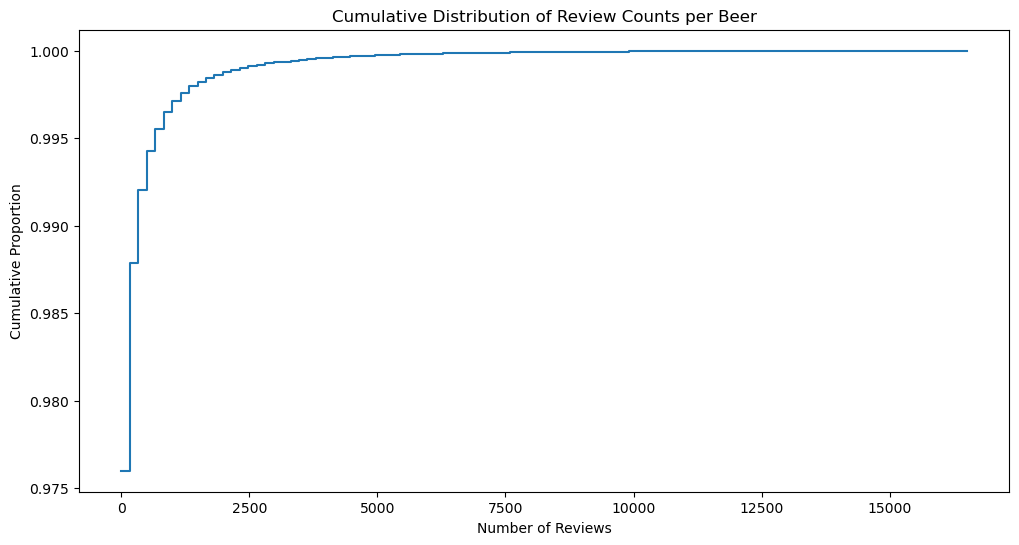

In [11]:
# Cumulative Distribution Plot
plt.figure(figsize=(12, 6))
sns.histplot(review_counts, bins=100, cumulative=True, stat="density", element="step", fill=False)
plt.title("Cumulative Distribution of Review Counts per Beer")
plt.xlabel("Number of Reviews")
plt.ylabel("Cumulative Proportion")
plt.show()

### Most Popular Beer Styles:

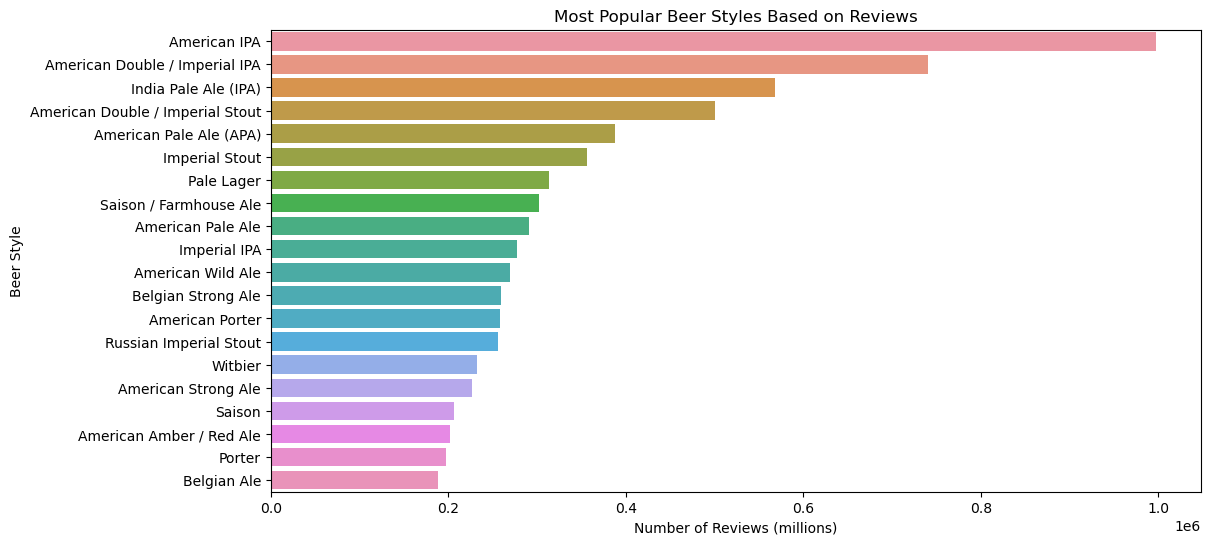

In [12]:
# Aggregate review counts by beer style
style_counts = all_reviews['style'].value_counts()

# Select the top N styles for visualization
# Adjust the number (e.g., 20) to display more or fewer styles
top_styles = style_counts.head(20)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_styles.values, y=top_styles.index)
plt.title("Most Popular Beer Styles Based on Reviews")
plt.xlabel("Number of Reviews (millions)")
plt.ylabel("Beer Style")
plt.show()